---
<center>

# **Gerencia de Mejoramiento Originación y Cobranza**

</center>

<center>

## Solucion del Punto 3


---
**Realizado Por:**

   Samuel Huertas Rojas

---
</center>


In [1]:
#Importar la librerias necesarias
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



#Rectificar las versiones de las librerias
!python --version
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Matplotlib 3.7.1
Seaborn 0.13.1
Pandas 2.0.3


In [2]:
# Vincular disco
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title Extracción de la ruta de los archivos
#Variable para almacenar la ruta donde estan guardados los datos en el drive
ruta_datos = "/content/drive/MyDrive/Trabajo/Prueba_Bancolombia-2024/Datos" # @param {type:"string"}
ruta_base_datos = []

carpeta_documentos = os.listdir(ruta_datos)
for archivo in carpeta_documentos:
  ruta_archivo = Path(ruta_datos, archivo)
  if ruta_archivo.suffix == '.csv':
    ruta_base_datos.append(ruta_archivo)

print(ruta_base_datos)

[PosixPath('/content/drive/MyDrive/Trabajo/Prueba_Bancolombia-2024/Datos/exa_barrios_cali.csv'), PosixPath('/content/drive/MyDrive/Trabajo/Prueba_Bancolombia-2024/Datos/exa_dispositivos_cali.csv'), PosixPath('/content/drive/MyDrive/Trabajo/Prueba_Bancolombia-2024/Datos/exa_trx_clientes.csv')]


## Creación de las Bases de Datos

In [5]:
#Crear la base de datos de los barrios de Cali
barrios_cali = pd.read_csv(ruta_base_datos[0])
barrios_cali = barrios_cali.rename(columns= {'codigo': 'id_barrio'})
barrios_cali.head()

,id_barrio,nombre
0,737998257,La Campina
1,737999435,Guayaquil
2,737998219,Vipasa
3,737996837,Lourdes
4,737997031,Villanueva


In [6]:
#Creación de la base de datos de los dispositivos
disp_cali = pd.read_csv(ruta_base_datos[1])
disp_cali = disp_cali.rename(columns= {'codigo': 'cod_dispositivo'})
disp_cali.head()

,tipo,cod_dispositivo,latitud,longitud,id_barrio
0,POS,1024702,3.451135,-76.530893,737998832
1,POS,1076402,3.446585,-76.517672,738000381
2,POS,1077002,3.446585,-76.517672,738000381
3,POS,3342404,3.476909,-76.485286,737998905
4,POS,3378003,3.485575,-76.516418,737998174


In [7]:
#Creación de la base de datos de las transacciones
tran_cali = pd.read_csv(ruta_base_datos[2])
tran_cali.head()

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx
0,6861792605025121524,1,POS,14812028,3,22218042.0
1,1552970090928921643,1,POS,14388938,3,21583407.0
2,-4075904842556875666,1,POS,12370698,1,6185349.0
3,3539339627033221084,1,POS,10313583,2,10313583.0
4,5595554501572542610,1,POS,14358071,4,28716142.0


## Exploración de la las bases de datos

### Barrios de Cali
Información general de la base de datos de los barrios de Cali


In [8]:
barrios_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_barrio  337 non-null    int64 
 1   nombre     337 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


Mirando la información de la base de datos de los barrios de Cali, se puede observar que esta contiene dos columnas, las cuales son:


*   codigo: esta columna se compone de números enteros y estos representan los nombres de los barrios de Cali.
*   nombre: esta columna se compone por strings y tienen los nombres de los barrios de Cali.

Está base de datos contiene un total de 337 registros y sin ningún valor nulo.



In [9]:
#Revisar si no hay barrios duplicados
valores_duplicados = barrios_cali[barrios_cali.duplicated()]
print('Hay', valores_duplicados.shape[0], 'valores duplicados')

Hay 0 valores duplicados


In [10]:
#La columna 'id_barrio' es de typo 'int64', este tipo de datos puede causar problema en futaras manipulaciones en la base de datos,
# por lo que se va a cambiar este tipo de dato
barrios_cali['id_barrio'] = barrios_cali['id_barrio'].astype(str)
barrios_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_barrio  337 non-null    object
 1   nombre     337 non-null    object
dtypes: object(2)
memory usage: 5.4+ KB


### Dispositivos
Información general de la base de datos de los dispositivos en Cali. <br>
Una lista con dispositivos de canales físicos en Cali (sucursales, cajero dispensador y multifuncional, corresponsales bancarios, PAC y establecimientos – POS), incluyendo su posición geográfica.

In [11]:
disp_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             37284 non-null  object 
 1   cod_dispositivo  37284 non-null  int64  
 2   latitud          37284 non-null  float64
 3   longitud         37284 non-null  float64
 4   id_barrio        37284 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ MB


La base de datos no contiene valores nulos. <br>
Columnas de la base de datos de los dispositivos en Cali:


*   tipo: tipo de dispositivo
*   codigo: código del dispositivo
*   latitud, longitud: coordenadas del dispositivo
*   id_barrio: identificación del barrio en el que se encuentra el dispositivo





In [12]:
#Revisar si no hay barrios duplicados
valores_duplicados = disp_cali[disp_cali.duplicated()]
print('Hay', valores_duplicados.shape[0], 'valores duplicados')

Hay 0 valores duplicados


In [13]:
print('Valor minimo de los códigos de los dispositivos:', disp_cali['cod_dispositivo'].min())
print('Valor maximo de los códigos de los dispositivos:', disp_cali['cod_dispositivo'].max())

Valor minimo de los códigos de los dispositivos: 18
Valor maximo de los códigos de los dispositivos: 6921701174


In [14]:
#Al igual que la base de datos de los barrios de cali se deben de cambiar los tipos de datos de las columnas:
# - cod_dispositivo
# - id_barrio
#Ya que los datos se utilizan para identificar barrios y dispositivos
disp_cali[['id_barrio', 'cod_dispositivo']] = disp_cali[['id_barrio', 'cod_dispositivo']].astype({'id_barrio': str, 'cod_dispositivo': str})
disp_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             37284 non-null  object 
 1   cod_dispositivo  37284 non-null  object 
 2   latitud          37284 non-null  float64
 3   longitud         37284 non-null  float64
 4   id_barrio        37284 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [15]:
disp_cali['tipo'].unique()

array(['POS', 'PAC', 'CB', 'SAI', 'DISPENSADOR', 'MF'], dtype=object)

Significado de cada una de los tipos de dispositivos

*   POS: establecimientos – POS
*   PAC: PAC
*   CB: corresponsales bancarios
*   SAI: sucursales
*   DISPENSADOR:  cajero dispensador
*   MF: cajero multifuncional



In [16]:
from pyproj import Transformer
#Transformación a las columnas de longitud y latitud para poder graficarlas en un mapa
transformer = Transformer.from_crs('epsg:4269','epsg:4326',always_xy=True)
points = list(zip(disp_cali.longitud,disp_cali.latitud))
coordsDispCali = np.array(list(transformer.itransform(points)))
disp_cali['lonDispCali']= coordsDispCali[:,0]
disp_cali['latDispCali']= coordsDispCali[:,1]
disp_cali.drop(['latitud', 'longitud'], axis= 1, inplace= True)
disp_cali.head()

,tipo,cod_dispositivo,id_barrio,lonDispCali,latDispCali
0,POS,1024702,737998832,-76.530893,3.451135
1,POS,1076402,738000381,-76.517672,3.446585
2,POS,1077002,738000381,-76.517672,3.446585
3,POS,3342404,737998905,-76.485286,3.476909
4,POS,3378003,737998174,-76.516418,3.485575


In [17]:
merged_df = pd.merge(disp_cali, barrios_cali, on='id_barrio', how='inner')
merged_df.head()

,tipo,cod_dispositivo,id_barrio,lonDispCali,latDispCali,nombre
0,POS,1024702,737998832,-76.530893,3.451135,San Pedro
1,POS,3920804,737998832,-76.529130,3.451854,San Pedro
2,POS,10005031,737998832,-76.531958,3.449755,San Pedro
3,POS,10304228,737998832,-76.531170,3.450075,San Pedro
4,POS,10304616,737998832,-76.531869,3.449040,San Pedro


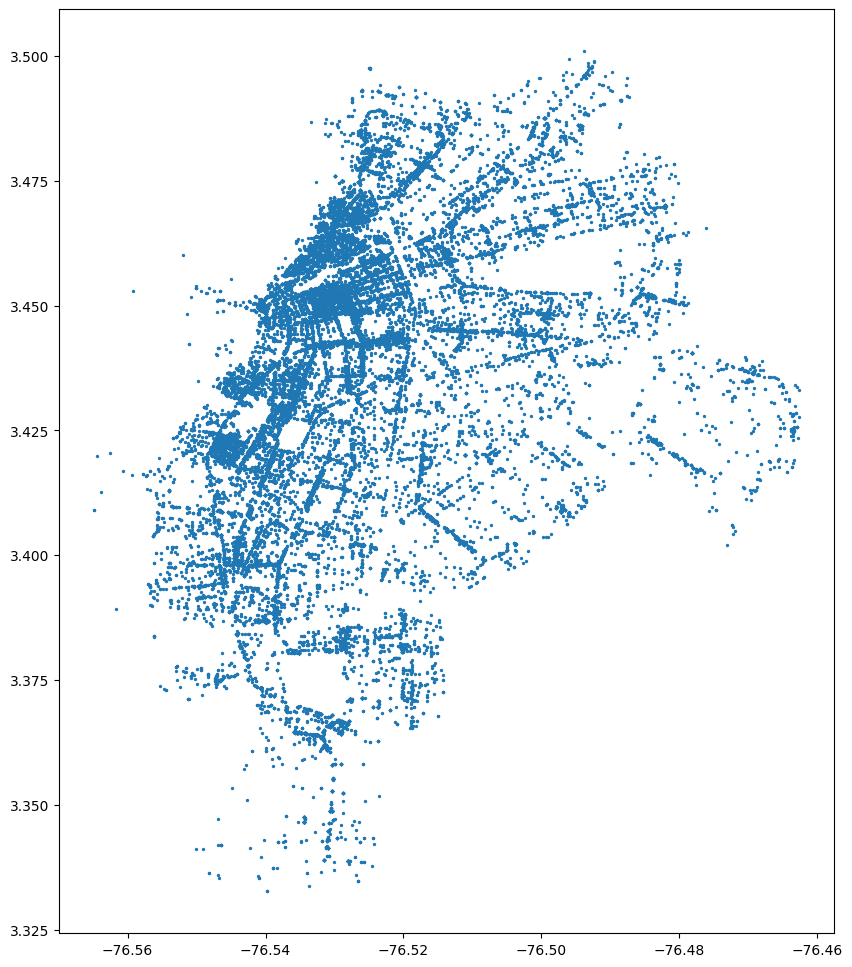

In [18]:
#Graficar los puntos de donde se ubican los dispositivos
figure = plt.figure(figsize=(10,12))
plt.scatter(merged_df.lonDispCali, merged_df.latDispCali, s=2)
plt.show()

In [19]:
merged_df['nombre'].value_counts().head(10)

nombre
San Pedro                     2226
San Vicente                   2058
Santa Mónica Residencial      1496
San Nicolás                   1419
Granada                       1297
Urbanización Tequendama        939
El Cedro                       875
Urbanización Ciudad Jardín     714
San Fernando Viejo             708
Barrio Eucarístico             572
Name: count, dtype: int64

In [20]:
dispositivos_barrio = merged_df.groupby(['nombre', 'tipo']).size()
dispositivos_barrio = dispositivos_barrio.reset_index()

In [21]:
dispositivos_barrio = pd.pivot_table(data= dispositivos_barrio, columns= 'tipo', index= 'nombre')
dispositivos_barrio

0                                 
tipo                          CB DISPENSADOR  MF  PAC    POS  SAI
nombre                                                           
12 de Octubre                1.0         NaN NaN  NaN    6.0  NaN
20 de Julio                  NaN         NaN NaN  NaN   16.0  NaN
3 de Julio                   1.0         NaN NaN  NaN  240.0  NaN
Acueducto San Antonio        NaN         NaN NaN  NaN   12.0  NaN
Aguablanca                   NaN         NaN NaN  NaN   33.0  NaN
...                          ...         ...  ..  ...    ...  ...
Villanueva                   NaN         NaN NaN  NaN    7.0  NaN
Ville Grande                 4.0         NaN NaN  NaN   68.0  NaN
Vipasa                       4.0         3.0 NaN  NaN  359.0  1.0
Yira Castro                  NaN         NaN NaN  NaN    2.0  NaN
Área Libre-Parque del Amor  2.0         1.0 NaN  1.0  123.0  NaN

[316 rows x 6 columns]

In [22]:
top5_disp_barrio = dispositivos_barrio.loc[list(merged_df['nombre'].value_counts().head(5).index)]
top5_disp_barrio

0                                   
tipo                        CB DISPENSADOR   MF  PAC     POS  SAI
nombre                                                           
San Pedro                 20.0        11.0  2.0  3.0  2187.0  3.0
San Vicente               17.0         4.0  1.0  1.0  2034.0  1.0
Santa Mónica Residencial   3.0        10.0  1.0  NaN  1479.0  3.0
San Nicolás               21.0         4.0  NaN  5.0  1388.0  1.0
Granada                    3.0         NaN  NaN  1.0  1292.0  1.0

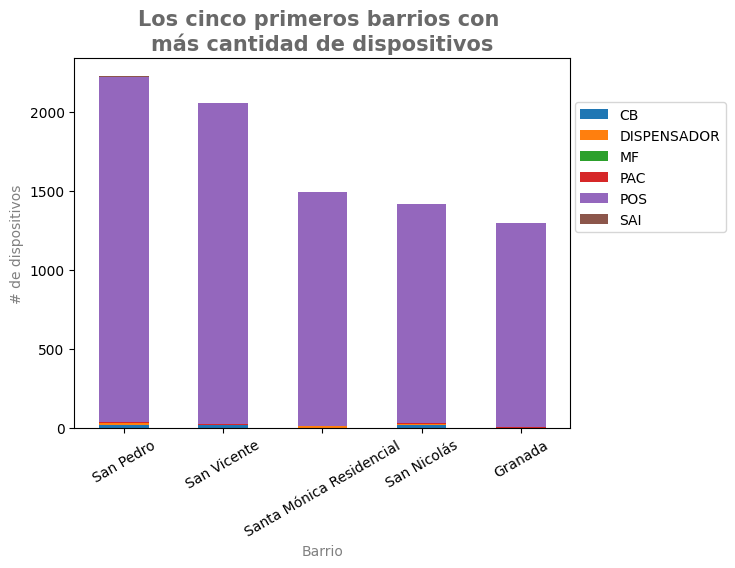

In [23]:
top5_disp_barrio.plot(kind= 'bar', stacked= True)

plt.title('Los cinco primeros barrios con \nmás cantidad de dispositivos', fontsize= 15, color= 'dimgrey', fontweight="bold")
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Barrio', fontsize= 10, color= 'gray')
plt.ylabel('# de dispositivos', fontsize= 10, color= 'gray')

plt.legend(['CB',	'DISPENSADOR',	'MF',	'PAC',	'POS',	'SAI'], bbox_to_anchor=(0.995, 0.9), ncol=1)
plt.show()

<ipython-input-24-6f45d9e0bbcd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= merged_df['nombre'].value_counts().head(5).index,


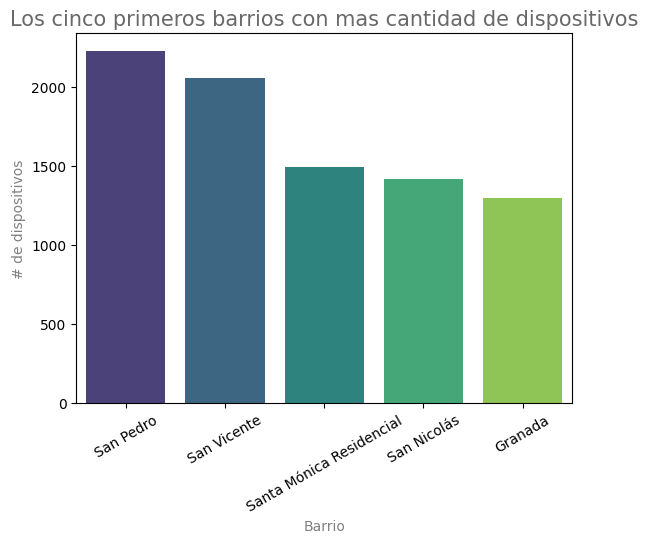

In [24]:
#Cantidad de dispositivos en cada barrio
ax = sns.barplot(x= merged_df['nombre'].value_counts().head(5).index,
            y= merged_df['nombre'].value_counts().head(5),
            palette= 'viridis')

plt.title('Los cinco primeros barrios con mas cantidad de dispositivos', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Barrio', fontsize= 10, color= 'gray')
plt.ylabel('# de dispositivos', fontsize= 10, color= 'gray')
plt.show()

In [25]:
#Cantidad de dispositivos por cada tipo
merged_df['tipo'].value_counts()

tipo
POS            36416
CB               527
DISPENSADOR      226
PAC               55
SAI               41
MF                19
Name: count, dtype: int64

<ipython-input-26-27476af32ff0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= merged_df['tipo'].value_counts().index,


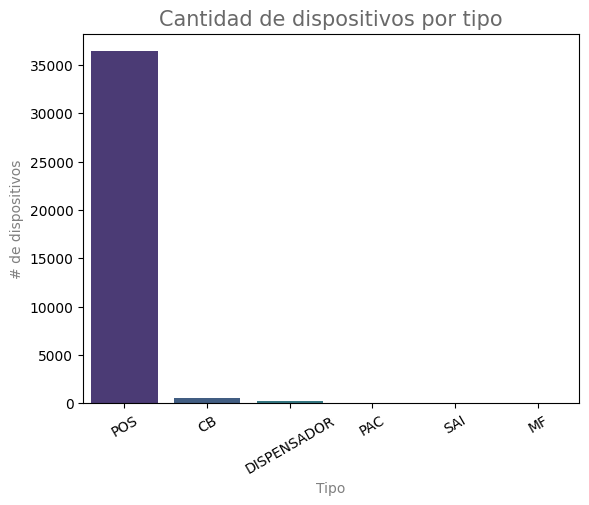

In [26]:
#Cantidad de dispositivos por cada tipo
ax = sns.barplot(x= merged_df['tipo'].value_counts().index,
            y= merged_df['tipo'].value_counts(),
            palette= 'viridis')

plt.title('Cantidad de dispositivos por tipo', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Tipo', fontsize= 10, color= 'gray')
plt.ylabel('# de dispositivos', fontsize= 10, color= 'gray')
plt.show()

In [44]:
#Ver si hay dispositivos con el mismo código
valores_duplicados_dispositivos = merged_df[merged_df['cod_dispositivo'] == '745']
valores_duplicados_dispositivos

,tipo,cod_dispositivo,id_barrio,lonDispCali,latDispCali,nombre
496,DISPENSADOR,745,737998832,-76.532942,3.451204,San Pedro
33632,SAI,745,737998095,-76.547986,3.414325,Unidad Residencial Santiago de Cali


In [51]:
#Contar la cantidad de dispositivos con el mismo codigo
cantidad_dispositivos_por_codigo = disp_cali['cod_dispositivo'].value_counts()
cantidad_dispositivos_por_codigo

cod_dispositivo
745           2
747           2
13589957      1
13596267      1
13596390      1
             ..
12658712      1
12659280      1
12687109      1
12693206      1
4023002563    1
Name: count, Length: 37282, dtype: int64

In [54]:
cantidad_dispositivos_por_codigo[cantidad_dispositivos_por_codigo > 1]

cod_dispositivo
745    2
747    2
Name: count, dtype: int64

Vemos que hay dos dispositivos con el mismo código, esto hay que tenerlo en cuenta cuando se realice la unión entre tablas.

### Transacciones
Contiene la cantidad y monto de las transacciones de varios tipos de clientes, tales como ciudadanos nacionales, extranjeros, empresas, entre otros; realizados por medio de los dispositivos en diferentes canales.

In [27]:
tran_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93446 entries, 0 to 93445
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_doc          93446 non-null  int64  
 1   tipo_doc         93446 non-null  int64  
 2   canal            93446 non-null  object 
 3   cod_dispositivo  93446 non-null  int64  
 4   num_trx          93446 non-null  int64  
 5   mnt_total_trx    93446 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.3+ MB


In [28]:
#Las columnas que se les debe de cambiar el tipo de dato son:
# - num_doc
# - tipo_doc
# - cod_dispositivo
# Estas se deben de cambiar ya que no representan valores numericos, si no que sirven para identificar personas, tipos de documentos y dispositivos utilizados
tran_cali[['num_doc', 'tipo_doc', 'cod_dispositivo']] = tran_cali[['num_doc', 'tipo_doc', 'cod_dispositivo']].astype({'num_doc': str, 'tipo_doc': str,'cod_dispositivo': str})
tran_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93446 entries, 0 to 93445
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_doc          93446 non-null  object 
 1   tipo_doc         93446 non-null  object 
 2   canal            93446 non-null  object 
 3   cod_dispositivo  93446 non-null  object 
 4   num_trx          93446 non-null  int64  
 5   mnt_total_trx    93446 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ MB


In [29]:
print('Valor minimo de la columna numero de transacciones:', tran_cali['num_trx'].min())
print('Valor maximo de la columna numero de transacciones:', tran_cali['num_trx'].max())
print('Valor promedio de la columna numero de transacciones:', tran_cali['num_trx'].mean())
print('Valor desviación estandar de la numero de transacciones:', tran_cali['num_trx'].std())

Valor minimo de la columna numero de transacciones: 1
Valor maximo de la columna numero de transacciones: 315
Valor promedio de la columna numero de transacciones: 3.218093872396892
Valor desviación estandar de la numero de transacciones: 6.272303131949468


In [30]:
print('Valor minimo de la columna monto total:', tran_cali['mnt_total_trx'].min())
print('Valor maximo de la columna monto total:', tran_cali['mnt_total_trx'].max())
print('Valor promedio de la columna monto total:', tran_cali['mnt_total_trx'].mean())
print('Valor desviación estandar de la columna monto total:', tran_cali['mnt_total_trx'].std())

Valor minimo de la columna monto total: 30.0
Valor maximo de la columna monto total: 123209539563.5
Valor promedio de la columna monto total: 166256771.24971107
Valor desviación estandar de la columna monto total: 1365724767.0719697


In [31]:
print('La base de datos de transacciones tiene una forma de:', tran_cali.shape)
print('Las columnas de la base de datos de transacciones son:', list(tran_cali.columns))
print('Tipos de documentos:', list(tran_cali['tipo_doc'].value_counts().index))

La base de datos de transacciones tiene una forma de: (93446, 6)
Las columnas de la base de datos de transacciones son: ['num_doc', 'tipo_doc', 'canal', 'cod_dispositivo', 'num_trx', 'mnt_total_trx']
Tipos de documentos: ['1', '2', '3', '4', '9']


In [32]:
#Numero de transacciones por tipo de documento
tran_cali['tipo_doc'].value_counts()

tipo_doc
1    90746
2     2670
3       16
4       12
9        2
Name: count, dtype: int64

<ipython-input-33-61adce9acbfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= tran_cali['tipo_doc'].value_counts().index,


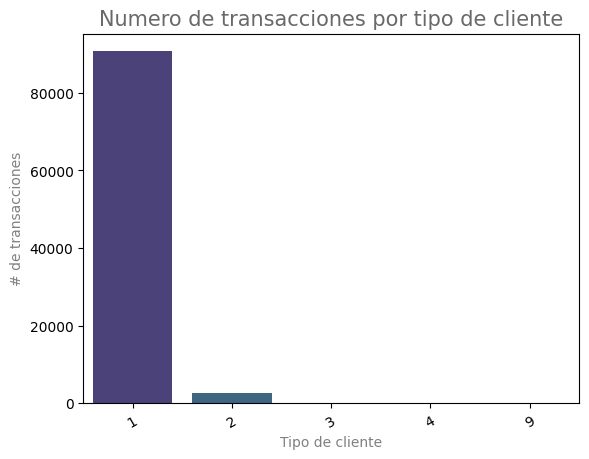

In [33]:
#Numero de transacciones por tipo de cliente
ax = sns.barplot(x= tran_cali['tipo_doc'].value_counts().index,
            y= tran_cali['tipo_doc'].value_counts(),
            palette= 'viridis')

plt.title('Numero de transacciones por tipo de cliente', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Tipo de cliente', fontsize= 10, color= 'gray')
plt.ylabel('# de transacciones', fontsize= 10, color= 'gray')
plt.show()

La mayor cantidad de transacciones es realizada por ciudadanos nacionales.

In [34]:
#Numero de transacciones por dispositivo
tran_cali['cod_dispositivo'].value_counts().head(5)

cod_dispositivo
745         689
11303609    539
829         503
747         475
812         467
Name: count, dtype: int64

<ipython-input-35-e68bc0e5d020>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= tran_cali['cod_dispositivo'].value_counts().head(5).index.astype(str),


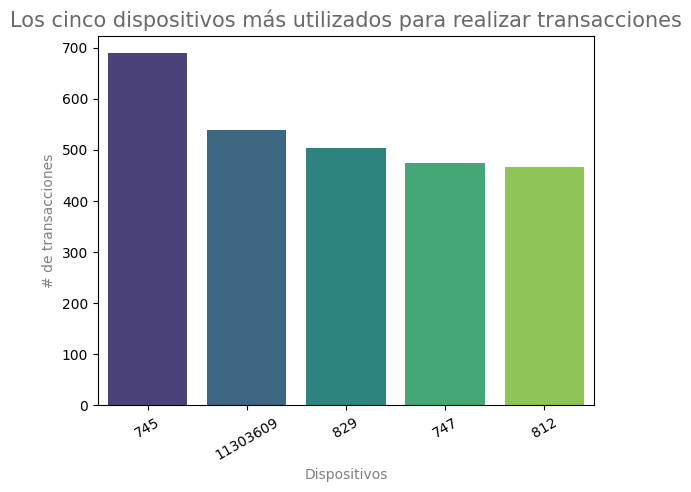

In [35]:
#Numero de transacciones por dispositivo
ax = sns.barplot(x= tran_cali['cod_dispositivo'].value_counts().head(5).index.astype(str),
            y= tran_cali['cod_dispositivo'].value_counts().head(5),
            palette= 'viridis')

plt.title('Los cinco dispositivos más utilizados para realizar transacciones', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Dispositivos', fontsize= 10, color= 'gray')
plt.ylabel('# de transacciones', fontsize= 10, color= 'gray')
plt.show()

In [55]:
#Cantidad de transacciones realizadas
tran_cali['canal'].value_counts()

canal
DISPENSADOR    37090
POS            37067
SAI             8810
CB              7076
MF              3386
PAC               17
Name: count, dtype: int64

<ipython-input-56-47ec47442621>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= tran_cali['canal'].value_counts().index,


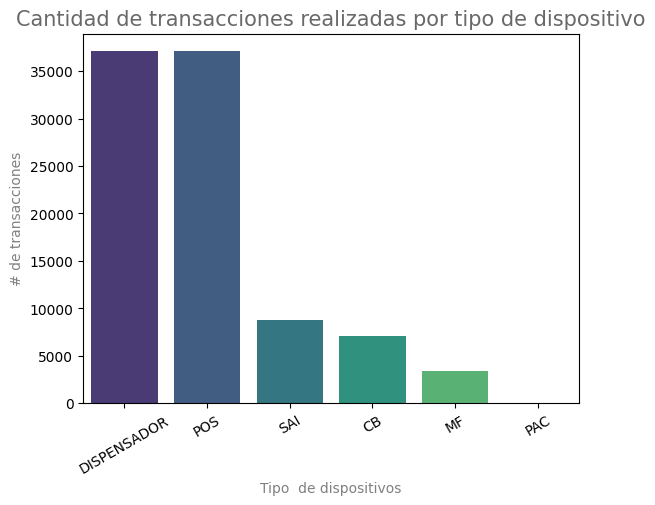

In [56]:
#Numero de transacciones por dispositivo
ax = sns.barplot(x= tran_cali['canal'].value_counts().index,
            y= tran_cali['canal'].value_counts(),
            palette= 'viridis')

plt.title('Cantidad de transacciones realizadas por tipo de dispositivo', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Tipo  de dispositivos', fontsize= 10, color= 'gray')
plt.ylabel('# de transacciones', fontsize= 10, color= 'gray')
plt.show()

El dispositivo más utilizado para realizar transacciones son los ‘DISPENSADORES’ y ‘POS’

<ipython-input-57-bcec9c05565d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= tran_cali['num_doc'].value_counts().head(5).index.astype(str),


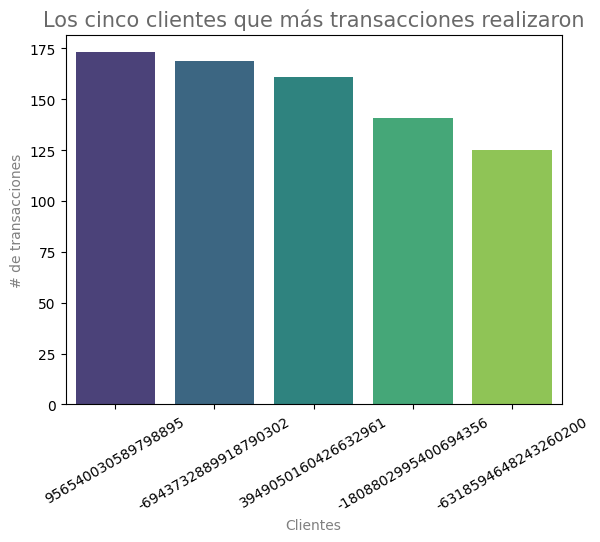

In [57]:
#Los clientes que realizaron más transacciones
ax = sns.barplot(x= tran_cali['num_doc'].value_counts().head(5).index.astype(str),
            y= tran_cali['num_doc'].value_counts().head(5),
            palette= 'viridis')

plt.title('Los cinco clientes que más transacciones realizaron', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Clientes', fontsize= 10, color= 'gray')
plt.ylabel('# de transacciones', fontsize= 10, color= 'gray')
plt.show()

# Preguntas de la prueba




## Primera pregunta
 ¿Cuáles son los barrios en los que se concentran los movimientos de al menos el 51% del dinero total tranzado por cada cliente? Considere que los clientes pueden tener más de un barrio.

In [58]:
tran_disp_merge = pd.merge(tran_cali, disp_cali, on='cod_dispositivo', how='inner')
tran_barrio_merge = pd.merge(tran_disp_merge, barrios_cali, on='id_barrio', how='inner')
tran_barrio_merge.drop(['tipo_doc', 'canal', 'tipo', 'lonDispCali', 'latDispCali'], axis= 1, inplace= True)
tran_barrio_merge

,num_doc,cod_dispositivo,num_trx,mnt_total_trx,id_barrio,nombre
0,6861792605025121524,14812028,3,2.221804e+07,737998244,Canaverales Los Samanes
1,7710641099837673137,14812028,1,7.406014e+06,737998244,Canaverales Los Samanes
2,-982128872141133516,14812028,1,7.406014e+06,737998244,Canaverales Los Samanes
3,-6501009745672025162,14812028,1,7.406014e+06,737998244,Canaverales Los Samanes
4,-4075904842556875666,12370698,1,6.185349e+06,737998244,Canaverales Los Samanes
...,...,...,...,...,...,...
94605,-2199049171597676383,13950431,2,1.395043e+07,737998810,El Paraíso
94606,1743931032085932584,15194269,2,1.519427e+07,737998109,Unidad Residencial El Coliseo
94607,-8122738654551755051,14038574,1,7.019287e+06,737996870,Colinas del Sur
94608,-2254984272742740511,1823322965,2,1.823323e+09,737996726,El Vergel


Primero, agrupar los datos por cliente y barrio para calcular el dinero total transado por cada cliente en cada barrio y para cada grupo de cliente y barrio, sumar el dinero total transado por el cliente

In [59]:
cliente_barrio = tran_barrio_merge.groupby(['num_doc', 'nombre'])['mnt_total_trx'].agg(mnt_total_trx_barrio='sum')
cliente_barrio = cliente_barrio.reset_index()
cliente_barrio

,num_doc,nombre,mnt_total_trx_barrio
0,-100445302626552670,Unicentro Cali,2696.0
1,-1004769336747862315,Urbanización La Flora,418.0
2,-1006371309257548646,Unicentro Cali,414.5
3,-1008226411248037048,San Antonio,16664.0
4,-1008226411248037048,San Pedro,60.0
...,...,...,...
55761,988313494016465029,Área Libre-Parque del Amor,6787535.5
55762,989380389770427585,San Vicente,12806507.5
55763,989380389770427585,Urbanización Ciudad Jardín,10336139.0
55764,98946898638335839,Los Alcázares,370.5


 Calcular el porcentaje del dinero total transado por el cliente en cada barrio con respecto al total transado por el cliente en todos los barrios.

In [60]:
cliente_total_trx = tran_barrio_merge.groupby('num_doc').sum()
cliente_total_trx = cliente_total_trx.reset_index()
cliente_total_trx

,num_doc,cod_dispositivo,num_trx,mnt_total_trx,id_barrio,nombre
0,-100445302626552670,5392,1,2.696000e+03,738000377,Unicentro Cali
1,-1004769336747862315,836,1,4.180000e+02,737998174,Urbanización La Flora
2,-1006371309257548646,829,1,4.145000e+02,738000377,Unicentro Cali
3,-1008226411248037048,478447836074983324597829,21,4.786050e+04,7380004077380004077379988327379981947380022757...,Urbanización San JuaquínUrbanización San Juaqu...
4,-1009950503667478931,1104423593,1,5.522118e+08,737998095,Unidad Residencial Santiago de Cali
...,...,...,...,...,...,...
9995,98552636730219731,1104418889,1,5.522094e+08,737998204,Versalles
9996,988313494016465029,1429213012962114121167521357507112642880126428...,112,3.417331e+09,7379982527379982527379982527379981717379981747...,ChipichapeChipichapeChipichapeÁrea Libre-Parq...
9997,989380389770427585,103361391454082711072188,4,2.314265e+07,738000383737998251737998251,Urbanización Ciudad JardínSan VicenteSan Vicente
9998,98946898638335839,741,1,3.705000e+02,737998878,Los Alcázares


In [61]:
mapeo = cliente_total_trx.set_index('num_doc')['mnt_total_trx']
cliente_barrio['mnt_total_trx_cliente'] = cliente_barrio['num_doc'].map(mapeo)
cliente_barrio['%_cada_barrio'] = round(cliente_barrio['mnt_total_trx_barrio'] / cliente_barrio['mnt_total_trx_cliente'] * 100, 3)
cliente_barrio

,num_doc,nombre,mnt_total_trx_barrio,mnt_total_trx_cliente,%_cada_barrio
0,-100445302626552670,Unicentro Cali,2696.0,2.696000e+03,100.000
1,-1004769336747862315,Urbanización La Flora,418.0,4.180000e+02,100.000
2,-1006371309257548646,Unicentro Cali,414.5,4.145000e+02,100.000
3,-1008226411248037048,San Antonio,16664.0,4.786050e+04,34.818
4,-1008226411248037048,San Pedro,60.0,4.786050e+04,0.125
...,...,...,...,...,...
55761,988313494016465029,Área Libre-Parque del Amor,6787535.5,3.417331e+09,0.199
55762,989380389770427585,San Vicente,12806507.5,2.314265e+07,55.337
55763,989380389770427585,Urbanización Ciudad Jardín,10336139.0,2.314265e+07,44.663
55764,98946898638335839,Los Alcázares,370.5,3.705000e+02,100.000


Finalmente, identificar los barrios donde al menos el 51% del dinero total transado por cada cliente está concentrado.

In [62]:
barrio_51_mayor = cliente_barrio.loc[cliente_barrio['%_cada_barrio'] >= 51]
barrio_51_mayor

,num_doc,nombre,mnt_total_trx_barrio,mnt_total_trx_cliente,%_cada_barrio
0,-100445302626552670,Unicentro Cali,2.696000e+03,2.696000e+03,100.000
1,-1004769336747862315,Urbanización La Flora,4.180000e+02,4.180000e+02,100.000
2,-1006371309257548646,Unicentro Cali,4.145000e+02,4.145000e+02,100.000
9,-1009950503667478931,Unidad Residencial Santiago de Cali,5.522118e+08,5.522118e+08,100.000
28,-1027836485982139155,Calimio Desepaz,1.331218e+09,1.331308e+09,99.993
...,...,...,...,...,...
55744,984135683056927607,Lili,1.325000e+02,1.325000e+02,100.000
55745,98552636730219731,Versalles,5.522094e+08,5.522094e+08,100.000
55762,989380389770427585,San Vicente,1.280651e+07,2.314265e+07,55.337
55764,98946898638335839,Los Alcázares,3.705000e+02,3.705000e+02,100.000


In [63]:
barrio_51_mayor['nombre'].value_counts().head(10)

nombre
San Vicente                   575
San Pedro                     368
Unicentro Cali                359
Urbanización San Juaquín      288
El Sena                       283
Santa Mónica Residencial      235
El Cedro                      232
Lili                          230
Urbanización Ciudad Jardín    220
Chipichape                    208
Name: count, dtype: int64

In [64]:
barrio_51_mayor.to_csv('sol_ej_a.csv', index= False)

## Segunda pregunta
¿Cuáles son los 5 barrios donde la mayor cantidad de clientes únicos realizan transacciones en dispositivos tipo POS? La respuesta debe incluir la cantidad de clientes únicos asociados a estos barrios.

In [65]:
#Realizar un filtrado para las transacciones realizadas en dispositivos tipo POS
trans_pos = tran_cali.loc[tran_cali['canal'] == 'POS']
trans_pos.reset_index(drop= True, inplace= True)
trans_pos

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx
0,6861792605025121524,1,POS,14812028,3,22218042.0
1,1552970090928921643,1,POS,14388938,3,21583407.0
2,-4075904842556875666,1,POS,12370698,1,6185349.0
3,3539339627033221084,1,POS,10313583,2,10313583.0
4,5595554501572542610,1,POS,14358071,4,28716142.0
...,...,...,...,...,...,...
37062,1323820439122578839,2,POS,12547568,1,6273784.0
37063,7384881907983316556,2,POS,14540827,1,7270413.5
37064,-6348237779291065861,2,POS,14293468,1,7146734.0
37065,-5638568367379363305,2,POS,13809496,1,6904748.0


In [66]:
#Se realiza la unión entre la base de datos de transacciones y la localización de los dispositivos
trans_barrios_pos = pd.merge(trans_pos, merged_df, on='cod_dispositivo', how='inner')
trans_barrios_pos.drop(['tipo', 'id_barrio', 'lonDispCali', 'latDispCali'], axis= 1, inplace= True)
#Se crea una columna con el numero de dodumenco del cliente y el nombre del barrio para identificar los clientes únicos
trans_barrios_pos['clientes_unicos'] = trans_barrios_pos['num_doc'] + '-' + trans_barrios_pos['nombre']
trans_barrios_pos

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,nombre,clientes_unicos
0,6861792605025121524,1,POS,14812028,3,22218042.0,Canaverales Los Samanes,6861792605025121524-Canaverales Los Samanes
1,7710641099837673137,1,POS,14812028,1,7406014.0,Canaverales Los Samanes,7710641099837673137-Canaverales Los Samanes
2,-982128872141133516,1,POS,14812028,1,7406014.0,Canaverales Los Samanes,-982128872141133516-Canaverales Los Samanes
3,-6501009745672025162,1,POS,14812028,1,7406014.0,Canaverales Los Samanes,-6501009745672025162-Canaverales Los Samanes
4,1552970090928921643,1,POS,14388938,3,21583407.0,Jorge Eliecer Gaitan,1552970090928921643-Jorge Eliecer Gaitan
...,...,...,...,...,...,...,...,...
37062,8420774247431028867,1,POS,10770949,4,21541898.0,Urbanización Tequendama,8420774247431028867-Urbanización Tequendama
37063,-37573732323950758,1,POS,14789796,1,7394898.0,Los Guayacanes,-37573732323950758-Los Guayacanes
37064,-2207865837801756001,1,POS,10337087,1,5168543.5,Sucre,-2207865837801756001-Sucre
37065,5788601845330389371,1,POS,11115771,1,5557885.5,Granada,5788601845330389371-Granada


In [67]:
#Se eliminan los clientes que compran en más de un solo lugar
clientes_unicos = trans_barrios_pos.duplicated(subset=['clientes_unicos'], keep=False)
trans_barrios_pos_unicos = trans_barrios_pos[clientes_unicos]
trans_barrios_pos_unicos

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,nombre,clientes_unicos
2,-982128872141133516,1,POS,14812028,1,7406014.0,Canaverales Los Samanes,-982128872141133516-Canaverales Los Samanes
3,-6501009745672025162,1,POS,14812028,1,7406014.0,Canaverales Los Samanes,-6501009745672025162-Canaverales Los Samanes
45,-109591158799621998,1,POS,14388938,1,7194469.0,Jorge Eliecer Gaitan,-109591158799621998-Jorge Eliecer Gaitan
57,-3572445621219554961,1,POS,14388938,1,7194469.0,Jorge Eliecer Gaitan,-3572445621219554961-Jorge Eliecer Gaitan
65,-2132980192906447503,1,POS,14388938,27,194250663.0,Jorge Eliecer Gaitan,-2132980192906447503-Jorge Eliecer Gaitan
...,...,...,...,...,...,...,...,...
37053,761665820614981016,1,POS,13571021,2,13571021.0,San Cayetano,761665820614981016-San Cayetano
37054,-6406560618801774505,1,POS,10526598,1,5263299.0,Sucre,-6406560618801774505-Sucre
37055,7797203336451497667,1,POS,14092381,1,7046190.5,Villa Colombia,7797203336451497667-Villa Colombia
37058,-8940326431364881655,1,POS,10758431,1,5379215.5,San Fernando Nuevo,-8940326431364881655-San Fernando Nuevo


In [68]:
#Se encuentran los cinco barrios con mas transacciones
top5_barrios_transacciones = trans_barrios_pos_unicos.groupby('nombre').sum().sort_values(by= 'num_trx', ascending= False).head(5)
top5_barrios_transacciones

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,clientes_unicos
nombre,,,,,,,
Santa Mónica Residencial,203603950099350313-996773078836716531-63063488...,1111111111111111111111111111111111111111111111...,POSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSP...,1032768210327682103276821032768210327682103276...,4370,2.513979e+10,203603950099350313-Santa Mónica Residencial-99...
Parcelaciones Pance,35958709602677330879185853098551911194-7526618...,1111111111111111111111111121111111112111111121...,POSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSP...,1475550814755508147555081475550814755508147555...,2930,2.007854e+10,3595870960267733087-Parcelaciones Pance9185853...
Urbanización Ciudad Jardín,-70203004595597890109144295405406454526-293992...,1111111111111211111111111112211111221111111111...,POSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSP...,1157689911576899115768991157689911576899115768...,2683,1.737161e+10,-7020300459559789010-Urbanización Ciudad Jardí...
Urbanización San Juaquín,-89403264313648816554373349805311056940-316057...,1111111111111111111111111111111111212111111111...,POSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSP...,1215298912152989121529891215298912152989121529...,2318,1.349309e+10,-8940326431364881655-Urbanización San Juaquín4...
San Vicente,-47207044580897282988742631298272501593-657070...,1111111111111111111111111222222111111111111111...,POSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSPOSP...,1454082714540827145408271454082714540827145408...,1952,1.192033e+10,-4720704458089728298-San Vicente87426312982725...


In [69]:
#Se agrupan por las columnas del nombre del barrio y documento del cliente
clientes_transferencias = trans_barrios_pos_unicos.groupby(['nombre', 'num_doc']).size()
clientes_transferencias = clientes_transferencias.reset_index()
clientes_transferencias

,nombre,num_doc,0
0,3 de Julio,-1438953278771482431,3
1,3 de Julio,-1595411720430850437,3
2,3 de Julio,-2038152210167151368,2
3,3 de Julio,-2559927509367529475,3
4,3 de Julio,-3105984603933167071,2
...,...,...,...
5890,Área Libre-Parque del Amor,8163259817298165807,2
5891,Área Libre-Parque del Amor,8306521443227811903,2
5892,Área Libre-Parque del Amor,8731908582791478273,2
5893,Área Libre-Parque del Amor,8798468695133417824,2


In [70]:
lista_top5_barrios = list(top5_barrios_transacciones.index)
lista_top5_barrios

['Santa Mónica Residencial',
 'Parcelaciones Pance',
 'Urbanización Ciudad Jardín',
 'Urbanización San Juaquín',
 'San Vicente']

In [71]:
#Se filtro la base de datos agrupada por los nombres de los cinco barrios con más transacciones
clientes_transferencias_top5_barrios = clientes_transferencias[(clientes_transferencias['nombre'] == lista_top5_barrios[0]) |
                                                              (clientes_transferencias['nombre'] == lista_top5_barrios[1]) |
                                                               (clientes_transferencias['nombre'] == lista_top5_barrios[2]) |
                                                               (clientes_transferencias['nombre'] == lista_top5_barrios[3]) |
                                                               (clientes_transferencias['nombre'] == lista_top5_barrios[4]) ]
clientes_transferencias_top5_barrios

,nombre,num_doc,0
2826,Parcelaciones Pance,-1016426677304899775,2
2827,Parcelaciones Pance,-106731177810354224,2
2828,Parcelaciones Pance,-1143641203722206728,8
2829,Parcelaciones Pance,-1277172993858543101,10
2830,Parcelaciones Pance,-1441662736349670906,3
...,...,...,...
5624,Urbanización San Juaquín,9007273737630480769,3
5625,Urbanización San Juaquín,901786527324933587,2
5626,Urbanización San Juaquín,9027857483566558950,3
5627,Urbanización San Juaquín,956540030589798895,3


In [72]:
clientes_transferencias_top5_barrios = pd.pivot_table(data= clientes_transferencias_top5_barrios, columns= 'nombre', index= 'num_doc')
clientes_transferencias_top5_barrios

0                                       \
nombre               Parcelaciones Pance San Vicente Santa Mónica Residencial   
num_doc                                                                         
-1016426677304899775                 2.0         NaN                      NaN   
-1038754016974251967                 NaN         NaN                      2.0   
-106731177810354224                  2.0         NaN                      NaN   
-1076773904980335023                 NaN         NaN                      5.0   
-109591158799621998                  NaN         NaN                      NaN   
...                                  ...         ...                      ...   
94286789781875520                    NaN         5.0                      5.0   
956540030589798895                   2.0         5.0                      4.0   
968730872398081131                   3.0         NaN                      NaN   
988313494016465029                   NaN         NaN                      3.0   
989380389770427585                   NaN         2.0                      NaN   

                                                                          
nombre               Urbanización Ciudad Jardín Urbanización San Juaquín  
num_doc                                                                   
-1016426677304899775                        3.0                      NaN  
-1038754016974251967                        NaN                      NaN  
-106731177810354224                         NaN                      2.0  
-1076773904980335023                        NaN                      NaN  
-109591158799621998                         NaN                      2.0  
...                                         ...                      ...  
94286789781875520                           NaN                      NaN  
956540030589798895                          3.0                      3.0  
968730872398081131                          NaN                      2.0  
988313494016465029                          NaN                      NaN  
989380389770427585                          NaN                      NaN  

[900 rows x 5 columns]

In [73]:
num_transacciones = []
num_clientes = []
nombre_barrio = []

for i in clientes_transferencias_top5_barrios.columns:
  nombre_barrio.append(i[1])
  num_clientes.append(clientes_transferencias_top5_barrios[i].count())
  num_transacciones.append(clientes_transferencias_top5_barrios[i].sum())


top5_barrios_tran_pos = pd.DataFrame({'nombre_barrio': nombre_barrio, 'num_transacciones': num_transacciones, 'num_clientes': num_clientes})
top5_barrios_tran_pos

,nombre_barrio,num_transacciones,num_clientes
0,Parcelaciones Pance,1027.0,235
1,San Vicente,847.0,299
2,Santa Mónica Residencial,1200.0,321
3,Urbanización Ciudad Jardín,1175.0,254
4,Urbanización San Juaquín,1027.0,373


<ipython-input-74-dcdcb1b41457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= top5_barrios_tran_pos['nombre_barrio'],


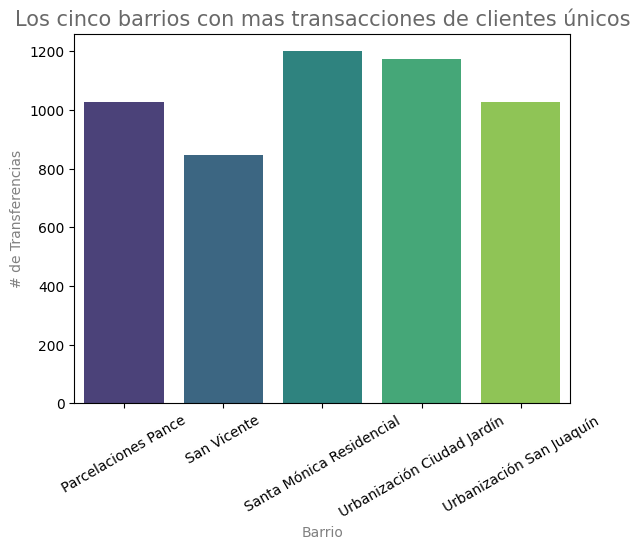

In [74]:
#Los cinco barrios con mas transacciones de clientes únicos
ax = sns.barplot(x= top5_barrios_tran_pos['nombre_barrio'],
            y= top5_barrios_tran_pos['num_transacciones'],
            palette= 'viridis')

plt.title('Los cinco barrios con mas transacciones de clientes únicos', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Barrio', fontsize= 10, color= 'gray')
plt.ylabel('# de Transferencias', fontsize= 10, color= 'gray')
plt.show()

<ipython-input-75-6268ca9f6212>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= top5_barrios_tran_pos['nombre_barrio'],


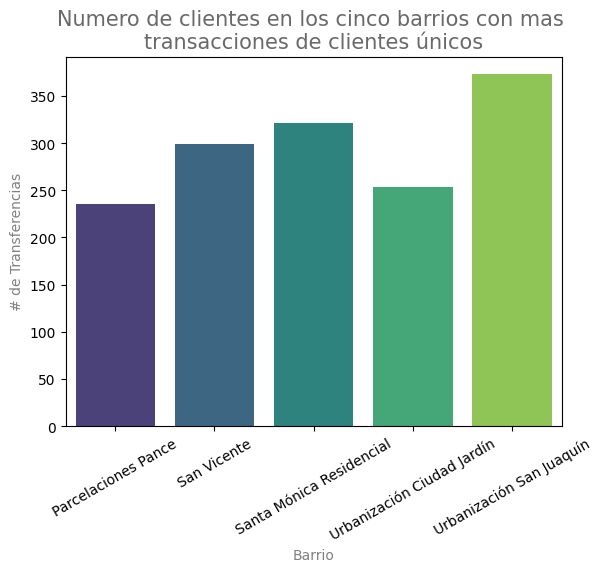

In [75]:
#Numero de clientes en los cinco barrios con mas transacciones de clientes únicos
ax = sns.barplot(x= top5_barrios_tran_pos['nombre_barrio'],
            y= top5_barrios_tran_pos['num_clientes'],
            palette= 'viridis')

plt.title('Numero de clientes en los cinco barrios con mas \ntransacciones de clientes únicos', fontsize= 15, color= 'dimgrey')
plt.xticks(rotation= 30, color= 'black')
plt.yticks(color= 'black')
plt.xlabel('Barrio', fontsize= 10, color= 'gray')
plt.ylabel('# de Transferencias', fontsize= 10, color= 'gray')
plt.show()

In [76]:
#Converitr a csv
top5_barrios_tran_pos.to_csv('sol_ej_b.csv', index= False)

## Tercera pregunta
¿Cuáles son las 10 distancias únicas de los dispositivos más alejados entre sí pertenecientes al barrio Caney? La respuesta debe estar en kilómetros.

In [77]:
#Dispositivos en el barrio Caney
caney_df = merged_df.loc[(merged_df['nombre'] == 'Caney')].reset_index(drop= True)
caney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             188 non-null    object 
 1   cod_dispositivo  188 non-null    object 
 2   id_barrio        188 non-null    object 
 3   lonDispCali      188 non-null    float64
 4   latDispCali      188 non-null    float64
 5   nombre           188 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.9+ KB


In [78]:
#Hacer la proyección de Mercator
def proyeccion_mercator(lon, lat):
  #Radio de la tierra
  R = 6371

  #Convertir longitud y latitud de grados a radianes
  lon_rad = np.radians(lon)
  lat_rad = np.radians(lat)

  #Calcular las coordenadas 'x' y 'y' utilizando la proyección de Mercator
  x = R * lon_rad
  y = R * np.log(np.tan(np.pi/4 + lat_rad/2))

  return x, y

In [79]:
#Aplicar al dataframe
caney_df[['x', 'y']] = caney_df.apply(lambda row: pd.Series(proyeccion_mercator(row['lonDispCali'], row['latDispCali'])), axis= 1)

In [80]:
#Funcion para calcular la distancia entre los puntos
def distancia_euclidiana(x1,y1,x2,y2):
  return np.sqrt((x2 -x1)**2 + (y2 - y1)**2)

In [81]:
coordenadas_x1 = []
coordenadas_y1 = []
coordenadas_x2 = []
coordenadas_y2 = []
par_puntos = []
distancia = []
codigo_dispositivo = []


for i in range(len(caney_df['x'])):
  for j in range(i+1, len(caney_df['x'])):
    x1, y1 = caney_df.iloc[i]['x'], caney_df.iloc[i]['y']
    x2, y2 = caney_df.iloc[j]['x'], caney_df.iloc[j]['y']
    coordenadas_x1.append(caney_df.iloc[i]['x'])
    coordenadas_y1.append(caney_df.iloc[i]['y'])
    coordenadas_x2.append(caney_df.iloc[j]['x'])
    coordenadas_y2.append(caney_df.iloc[j]['y'])
    codigo_dispositivo.append([caney_df.iloc[i]['cod_dispositivo'], caney_df.iloc[j]['cod_dispositivo']])
    par_puntos.append([i, j])
    distancia.append(distancia_euclidiana(x1,y1,x2,y2))

In [82]:
distancia_unica = pd.DataFrame({'par_puntos': par_puntos,
                                'distancia_puntos': distancia,
                                'coordenadas_x1': coordenadas_x1,
                                'coordenadas_y1': coordenadas_y1,
                                'coordenadas_x2': coordenadas_x2,
                                'coordenadas_y2': coordenadas_y2,
                                'codigo_dispositivos': codigo_dispositivo})

In [83]:
alejados = distancia_unica.sort_values(by= 'distancia_puntos', ascending= False).head(10)
alejados.drop(['par_puntos', 'coordenadas_x1', 'coordenadas_y1', 'coordenadas_x2', 'coordenadas_y2'], axis= 1, inplace= True)
alejados.reset_index(drop= True)

,distancia_puntos,codigo_dispositivos
0,1.228069,"[13084991, 14455588]"
1,1.228069,"[14700413, 15472822]"
2,1.228069,"[13084991, 15472822]"
3,1.228069,"[14455588, 14700413]"
4,1.210704,"[14700413, 14017875]"
5,1.210704,"[13084991, 14017875]"
6,1.190728,"[15377427, 14700413]"
7,1.190728,"[13084991, 14890156]"
8,1.190728,"[13084991, 15380264]"
9,1.190728,"[13084991, 14714067]"


In [84]:
distancia_unica.sort_values(by= 'distancia_puntos', ascending= False).head(10)

,par_puntos,distancia_puntos,coordenadas_x1,coordenadas_y1,coordenadas_x2,coordenadas_y2,codigo_dispositivos
1295,"[7, 15]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[13084991, 14455588]"
15712,"[126, 152]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[14700413, 15472822]"
1432,"[7, 152]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[13084991, 15472822]"
2810,"[15, 126]",1.228069,-8508.100331,376.095011,-8508.931988,376.998615,"[14455588, 14700413]"
15728,"[126, 168]",1.210704,-8508.931988,376.998615,-8508.198832,376.035139,"[14700413, 14017875]"
1448,"[7, 168]",1.210704,-8508.931988,376.998615,-8508.198832,376.035139,"[13084991, 14017875]"
12763,"[89, 126]",1.190728,-8508.156024,376.095446,-8508.931988,376.998615,"[15377427, 14700413]"
1363,"[7, 83]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 14890156]"
1441,"[7, 161]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 15380264]"
1401,"[7, 121]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 14714067]"


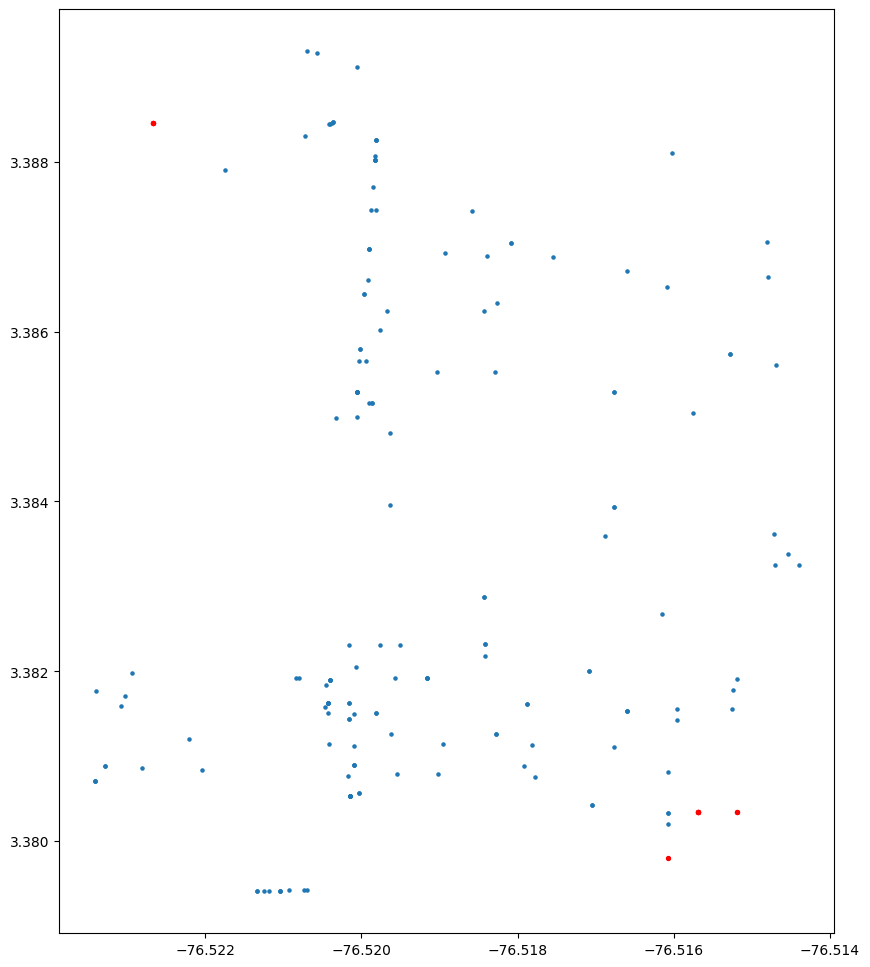

In [85]:
#Graficar los puntos de donde se ubican los dispositivos
figure = plt.figure(figsize=(10,12))
plt.scatter(caney_df.lonDispCali, caney_df.latDispCali, s=5)

plt.scatter(caney_df.loc[7].lonDispCali, caney_df.loc[7].latDispCali, s=8, c= 'red')
plt.scatter(caney_df.loc[15].lonDispCali, caney_df.loc[15].latDispCali, s=8, c= 'red')

plt.scatter(caney_df.loc[126].lonDispCali, caney_df.loc[126].latDispCali, s=8, c= 'red')
plt.scatter(caney_df.loc[152].lonDispCali, caney_df.loc[152].latDispCali, s=8, c= 'red')

plt.scatter(caney_df.loc[126].lonDispCali, caney_df.loc[126].latDispCali, s=8, c= 'red')
plt.scatter(caney_df.loc[168].lonDispCali, caney_df.loc[168].latDispCali, s=8, c= 'red')

plt.scatter(caney_df.loc[89].lonDispCali, caney_df.loc[89].latDispCali, s=8, c= 'red')
plt.scatter(caney_df.loc[83].lonDispCali, caney_df.loc[83].latDispCali, s=8, c= 'red')

plt.scatter(caney_df.loc[161].lonDispCali, caney_df.loc[161].latDispCali, s=8, c= 'red')
plt.scatter(caney_df.loc[121].lonDispCali, caney_df.loc[121].latDispCali, s=8, c= 'red')

plt.show()

In [86]:
alejados.to_csv('sol_ej_c.csv', index= False)

In [87]:
graficar_alejados = distancia_unica.sort_values(by= 'distancia_puntos', ascending= False).head(10)
graficar_alejados

,par_puntos,distancia_puntos,coordenadas_x1,coordenadas_y1,coordenadas_x2,coordenadas_y2,codigo_dispositivos
1295,"[7, 15]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[13084991, 14455588]"
15712,"[126, 152]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[14700413, 15472822]"
1432,"[7, 152]",1.228069,-8508.931988,376.998615,-8508.100331,376.095011,"[13084991, 15472822]"
2810,"[15, 126]",1.228069,-8508.100331,376.095011,-8508.931988,376.998615,"[14455588, 14700413]"
15728,"[126, 168]",1.210704,-8508.931988,376.998615,-8508.198832,376.035139,"[14700413, 14017875]"
1448,"[7, 168]",1.210704,-8508.931988,376.998615,-8508.198832,376.035139,"[13084991, 14017875]"
12763,"[89, 126]",1.190728,-8508.156024,376.095446,-8508.931988,376.998615,"[15377427, 14700413]"
1363,"[7, 83]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 14890156]"
1441,"[7, 161]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 15380264]"
1401,"[7, 121]",1.190728,-8508.931988,376.998615,-8508.156024,376.095446,"[13084991, 14714067]"
